In [1]:
"""
Advanced Computational Biology II
Assignment 5
Part 1: Dimensionality Reduction

Matthew McFee

"""

import sklearn
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Part 0: Data Preparation
exp_mat = pd.read_csv("expression_matrix.txt", sep="\t")
cell_names = exp_mat.columns
labels = pd.read_csv("cell_labels.txt", sep="\t", header=0)

exp_mat = pd.read_csv("expression_matrix.txt", sep="\t", skiprows=1, header=None)
exp_mat.drop(columns=0, axis=1, inplace=True)
exp_mat = exp_mat.T
exp_mat.insert(0, "NAME", cell_names)

df = exp_mat.merge(labels, on="NAME")
df.head(10)

NAME         0         1          2          3         4    5  \
0  CD141_P10_S73  0.000000  0.000000   0.000000  23.681615  5.367356  0.0   
1  CD141_P10_S74  0.000000  0.000000   0.000000   0.000000  0.000000  0.0   
2  CD141_P10_S75  0.000000  0.000000   0.000000   0.000000  0.000000  0.0   
3  CD141_P10_S76  0.000000  0.000000   0.000000   0.000000  0.000000  0.0   
4  CD141_P10_S77  1.311710  0.000000   0.000000  22.424958  0.000000  0.0   
5  CD141_P10_S78  2.612927  0.000000   0.000000   0.000000  0.000000  0.0   
6  CD141_P10_S79  1.397113  0.000000  16.783362   7.198919  0.000000  0.0   
7  CD141_P10_S80  0.000000  7.166118   0.000000   4.412299  0.000000  0.0   
8  CD141_P10_S81  0.588681  0.000000   0.000000   0.000000  0.000000  0.0   
9  CD141_P10_S82  0.000000  0.000000   0.000000   0.000000  0.000000  0.0   

          6    7    8  ...  22421  22422      22423      22424     22425  \
0  0.141254  0.0  0.0  ...    0.0    0.0   0.000000   7.408025  0.000000   
1  0.000000  0.0  0.0  ...    0.0    0.0   0.000000  16.507153  1.853885   
2  0.000000  0.0  0.0  ...    0.0    0.0  14.761931   0.154297  0.543214   
3  0.000000  0.0  0.0  ...    0.0    0.0   0.000000   0.000000  3.522191   
4  0.000000  0.0  0.0  ...    0.0    0.0   0.000000   0.000000  1.156307   
5  0.000000  0.0  0.0  ...    0.0    0.0   0.000000  18.380410  1.801384   
6  0.000000  0.0  0.0  ...    0.0    0.0   0.000000   0.154297  1.340331   
7  0.160794  0.0  0.0  ...    0.0    0.0   0.000000   0.367059  1.000876   
8  0.000000  0.0  0.0  ...    0.0    0.0   0.000000   0.502939  1.559452   
9  0.101723  0.0  0.0  ...    0.0    0.0   0.000000   0.287563  0.754342   

       22426      22427      22428      22429  CellType  
0   0.802690  18.596337   9.851156   0.000000       DC1  
1   1.650192   0.000000   2.620774   0.000000       DC5  
2   0.850469  15.202934  14.358859   0.000000       DC1  
3   1.106726  13.544608   0.000000   0.000000       DC1  
4   1.345086   6.582238   0.000000   0.000000       DC1  
5   1.051582   8.546784  17.867973   0.000000       DC5  
6   0.666896  22.163504   0.128146   0.000000       DC1  
7  15.891379   2.902264   2.369821  19.225097       DC1  
8   8.061307   4.691409   0.554636   0.000000       DC5  
9   0.061554   0.000000   0.000000   0.000000       DC1  

[10 rows x 22432 columns]

In [3]:
# Part 1: PCA
# a perform the PCA
data = df.iloc[:,1:-1].values
labels = df.iloc[:,-1].values

pca = sklearn.decomposition.PCA(n_components=10, random_state=1)

transformed_data = pca.fit_transform(data)

top_variance = pca.explained_variance_ratio_[:2]

In [4]:
print("Variance of top two PC: ", top_variance)

Variance of top two PC:  [0.19377493 0.12192506]


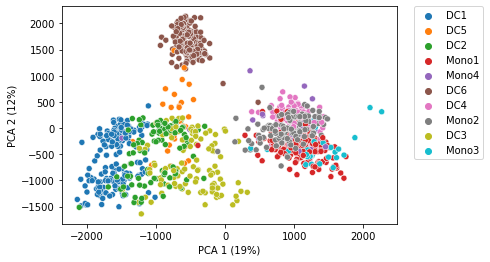

In [5]:
# plt.plot(transformed_data[:, 0], transformed_data[:, 1], "o")
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], hue=labels)
plt.xlabel("PCA 1 (19%)")
plt.ylabel("PCA 2 (12%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("pca.png", bbox_inches="tight")

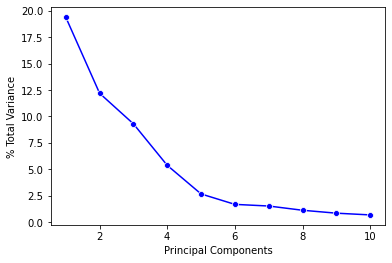

In [6]:
# b generate a scree plot
scree_values = pca.explained_variance_ratio_
scree_values = np.sort(scree_values)
scree_values = 100 * scree_values[::-1]
pca_values = list(range(1, len(scree_values) + 1))

sns.lineplot(x=pca_values, y=scree_values, color="blue", markers=True, marker="o")
plt.xlabel("Principal Components")
plt.ylabel("% Total Variance")
plt.savefig("scree.png", bbox_inches="tight")

Total variance explained ~55%

Number of components explaining > 1% of variance: 8 

In this example dataset we are operating in a very high dimensional space so the variance is "spread" across many dimensions. Although, it does appear that the first 10 principle components capture a large chunk of the variance it does not mean that there is a small amount of variance in the other components. The only way to capture (or almost all) would to have close to k (where k is the number of features) principle components.

In [7]:
total_variance = np.sum(pca.explained_variance_ratio_)
print("Total variance explained in first 10 PCL:", total_variance)

num_above = np.sum(pca.explained_variance_ratio_ > 0.01)
print("Number of principal components in top 10 explaining > 1% variance: ", num_above)

Total variance explained in first 10 PCL: 0.5487067412360804
Number of principal components in top 10 explaining > 1% variance:  8


In [8]:
# Part C: Repeat above only using 500 rows with the top variances
# variances = df.var(axis=0)
high_var_data = df.iloc[:,1:-1]
variances = high_var_data.var(axis=0)

high_var_idx = np.argsort(variances)[-500:]
high_var_idx = np.sort(high_var_idx)
high_var_data = high_var_data.loc[:, list(high_var_idx)]

In [9]:
# Repeat the above analysis
pca_high_var = sklearn.decomposition.PCA(n_components=10, random_state=5)

data_high_var = high_var_data.iloc[:,:].values
labels = df.iloc[:, -1].values

transformed_data_high_var = pca_high_var.fit_transform(data_high_var)

top_variance_high_var = pca_high_var.explained_variance_ratio_[:2]

# Generate plot
sns.scatterplot(x=transformed_data_high_var[:, 0], y=transformed_data_high_var[:, 1], hue=labels)
plt.xlabel("PCA 1 (26%)")
plt.ylabel("PCA 2 (16%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("pca_top_500.png", bbox_inches="tight")


print("Variance of first two prinicipal compents (top 500): ", top_variance_high_var)

Variance of first two prinicipal compents (top 500):  [0.26108963 0.1629941 ]


Appears to perform roughly the same visually from the graph. The first two PCA have higher values indicating they capture more of the variation

In [10]:
# Part 1: Nonegative Matrix Factorization
data = pd.read_csv("expression_matrix.txt", sep="\t").values

nmf = NMF(n_components=10, init="random", random_state=5, max_iter=5000, tol=1e-15)
X_nmf = nmf.fit_transform(data)

/home/matt/miniconda3/envs/kim/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 5000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [11]:
res = X_nmf @ nmf.components_

In [12]:
# Print tests for NMF
# print(data[0][4])
# # print(res[0][4])
# divisor = res.shape[0] * res.shape[1]
# print(nmf.reconstruction_err_**2 / divisor)

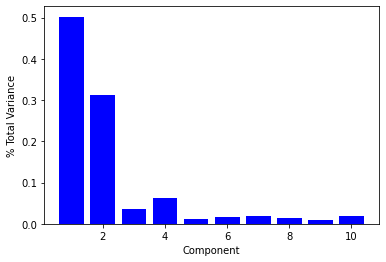

In [13]:
variances = np.var(X_nmf, axis=0)
total = np.sum(variances)
fractions = variances/ total
    
x_values = range(1, len(fractions) + 1)
    
# Plot
plt.bar(x_values, fractions, color="blue")
plt.xlabel("Component")
plt.ylabel("% Total Variance")
plt.savefig("nmf_var.png", bbox_inches="tight")

**Why do we have to randomly hide data from the matrix rather than hold out entire cells or genes?**
The idea of these dimensionality techniques is to move from a very large feature space down to a feature space which recapitulates the important aspects of the variation in the original data. Thus, in something like PCA we want to reduce our dimensions by finding the directions of maximum variance and then projecting the high dimensional data to this new feature space. In the case of PCA projecting onto the directions of maximum variance (maximizing variance) is equivalent to minimizing the reconstruction error. In other words, if the dimensionality reduction procedure is good, then reconstructing the data from the lower dimensional space back to the original space should have low reconstruction error.

We mask a subset of the data and then check its reconstruction of the masked values vs the reconstruction of the 70% of the data the NFM algorithm saw. I suppose the idea is that there is some optimal k which will result in the best W and H that will best reconstruct the original matrix. This best value should result in the originally missing "NA" values being close to their true values. If you hold out an entire gene or cell by setting it to 0's then a row or column of W or H will be set to 0 which doesn't make sense.

The best r value is about 10 as this is the point at which the validation reconstruction error reaches a minimum. Increasing r does nothing to reduce the validation set reconstruction error and thus we do not need any of those extra features.

/home/matt/miniconda3/envs/kim/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 5000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/matt/miniconda3/envs/kim/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 5000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/matt/miniconda3/envs/kim/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 5000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


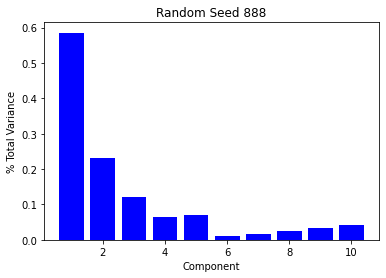

In [14]:
random_seeds = [2, 99, 888]

fractions = []

for random_seed in random_seeds:
    nmf_current = NMF(n_components=10, init="random", random_state=random_seed, max_iter=5000, tol=1e-15)
    X_nmf_current = nmf_current.fit_transform(data)
    
    # Calculate current variances
    variances_current = np.var(X_nmf_current, axis=0)
    total_current = np.sum(variances_current)
    
    fractions_current = variances_current / total_current
    fractions.append(fractions_current)
    
    x_values = range(1, len(fractions_current) + 1)
    
    # Plot
    plt.bar(x_values, fractions_current, color="blue")
    plt.title("Random Seed " + str(random_seed))
    plt.xlabel("Component")
    plt.ylabel("% Total Variance")
    file_name = "nmf_var_seed_" + str(random_seed) + ".png"
    plt.savefig(file_name, bbox_inches="tight")

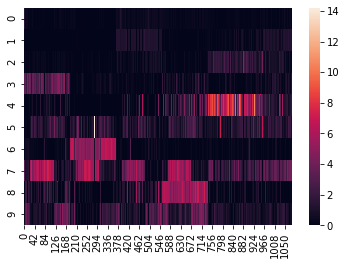

In [15]:
H = nmf.components_

sns.heatmap(H)
plt.savefig("h_heatmap.png", bbox_inches="tight")

The algorithm being used to compute the nonnegative matrix factorization appears to be to difference W matrices indicated by different variances per column across each run. The initialization of the matrices involves randomization. The solver is coordinate descent which works similarly to gradient descent but one parameter at a time. Essentially the H matrix we are getting is a Sample x Metagene matrix. It has a clustering property such that the metagene most highly expressed by any given sample corresponds to its assigned cluster. If H is specified to be orthogonal, obtaining H is mathematically equivalent to the k-means clustering method. 

References:
https://www.pnas.org/content/101/12/4164

https://ranger.uta.edu/~chqding/papers/NMF-SDM2005.pdf

In [16]:
# Part C: TSNE
# tsne_pca = PCA(n_components=50)
# data_tsne = tsne_pca.fit_transform(data)
data = pd.read_csv("expression_matrix.txt", sep="\t").values
X_tsne = TSNE(n_components=2, random_state=1, n_jobs=1, n_iter=500000, min_grad_norm=1e-30).fit_transform(data.T)

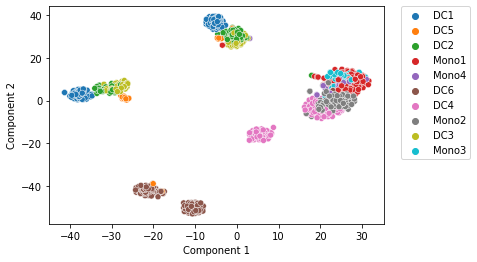

In [17]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("tsne.png", bbox_inches="tight")

In [18]:
perplexities = [2, 4, 12]

for perp in perplexities:
    X_tsne = TSNE(n_components=2, random_state=1, n_jobs=1, n_iter=500000, min_grad_norm=1e-30, perplexity=perp).fit_transform(data.T)
    
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("tSNE with Perplexity " + str(perp))
    
    file_name = "tsne_perplexity_" + str(perp) + ".png"
    
    plt.savefig(file_name, bbox_inches="tight")
    plt.clf()
    

random_seeds = [6, 66, 666]

for seed in random_seeds:
    X_tsne = TSNE(n_components=2, random_state=seed, n_jobs=1, n_iter=500000, min_grad_norm=1e-30).fit_transform(data.T)
    
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("tSNE Random Seed " + str(seed))
    
    file_name = "tsne_random_seed_" + str(seed) + ".png"
    
    plt.savefig(file_name, bbox_inches="tight")
    plt.clf()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1078 samples in 0.009s...
[t-SNE] Computed neighbors for 1078 samples in 0.191s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1078
[t-SNE] Computed conditional probabilities for sample 1078 / 1078
[t-SNE] Mean sigma: 525.948578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.341187
[t-SNE] KL divergence after 5950 iterations: 0.965315
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1078 samples in 0.009s...
[t-SNE] Computed neighbors for 1078 samples in 0.192s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1078
[t-SNE] Computed conditional probabilities for sample 1078 / 1078
[t-SNE] Mean sigma: 525.948578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.381157
[t-SNE] KL divergence after 5900 iterations: 0.960141
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1078 samples in 0.009s...
[t-SNE] Computed neighbors for 1078 samples 

<Figure size 432x288 with 0 Axes>

Mathematically, the perplexity controls the variance of the Gaussians centered at each high dimensional data point. These Gaussians are used to compute similarities between points in the high dimensional space and can be though of determining which points are the nearest neighbors of any given point. It effectively pulls the points together into tighter cluster as seen in the figures.

The tSNE algorithm is completely dependent on a random initialization and thus seed selection will impact the displayed results but shouldn't change which data points are closly clustered as seen in the figures.

There are pros and cons to using each of these dimenstionality reduction techniques. For example PCA is very easy to use and has a deterministic solution (you will reach the same principal components and vector projections each time), it is computationally simple but may require a large amount of memory. NMF is useful in that it also provides a means of easily clustering similar data points but the algorithms used to find its matrices are not guaranteed to find the global optimum and by definition the matrix to be factorized must have only nonnegative elements which restricts it to use cases where this makes sense (genetics, image rgb values etc.). tSNE is the most computationally complex of the factorization methods. It's strength is preserving local structures generating interpretable 2D visualizations, and works very well with large datasets. Furthermore, by definition tSNE can never be reconstructed to the original vector space.

In the case of our dataset tSNE performs the best because we have a very large number of features (22430). It more tightly clusters the data in comparison to PCA/NMF and exluding DC5 all of the DC clusters are very distinct from each other.